In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

# Importando a base

In [4]:
# Importando a base para o Pandas
df = pd.read_excel('../data/raw/dados_sono.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         374 non-null    int64  
 1   Gênero                     374 non-null    object 
 2   Idade                      374 non-null    int64  
 3   Profissão                  374 non-null    object 
 4   Duração do sono            374 non-null    float64
 5   Qualidade do sono          374 non-null    int64  
 6   Nível de Atividade Física  374 non-null    int64  
 7   Nível de Stress            374 non-null    int64  
 8   Categoria IMC              374 non-null    object 
 9   Pressão Sanguínea          374 non-null    object 
 10  Batimento Cardíaco         374 non-null    int64  
 11  Passos diários             374 non-null    int64  
 12  Distúrbio do sono          374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 3

In [6]:
df.sample(10)

,ID,Gênero,Idade,Profissão,Duração do sono,Qualidade do sono,Nível de Atividade Física,Nível de Stress,Categoria IMC,Pressão Sanguínea,Batimento Cardíaco,Passos diários,Distúrbio do sono
65,66,M,32,Médico,6.2,6,30,8,Normal,125/80,72,5000,-
81,82,F,34,Cientista,5.8,4,32,8,Sobrepeso,131/86,81,5200,Apneia do sono
36,37,M,31,Médico,6.1,6,30,8,Normal,125/80,72,5000,-
195,196,M,43,Vendedor,6.5,6,45,7,Sobrepeso,130/85,72,6000,Insônia
280,281,F,50,Enfermeiro,6.0,6,90,8,Sobrepeso,140/95,75,10000,-
30,31,F,30,Enfermeiro,6.4,5,35,7,Normal,130/86,78,4100,Apneia do sono
346,347,F,57,Enfermeiro,8.2,9,75,3,Sobrepeso,140/95,68,7000,Apneia do sono
61,62,M,32,Médico,6.0,6,30,8,Normal,125/80,72,5000,-
21,22,M,30,Médico,7.7,7,75,6,Normal,120/80,70,8000,-
29,30,M,30,Médico,7.9,7,75,6,Normal,120/80,70,8000,-


Temos 13 colunas e 374 linhas.

# Análise exploratória

Para buscar alguma conclusão com base nesses dados, podemos iniciar com uma análise exploratória de cada variável.

In [26]:
# Tabela de frequência aprimorada
def tab_freq(df, col):
    tab_freq = df[col].value_counts().reset_index()
    tab_freq.columns = [col, 'Freq. Absoluta']

    # Freq. Relativa
    tab_freq['Freq. Relativa'] = (100 * (tab_freq['Freq. Absoluta'] / tab_freq['Freq. Absoluta'].sum())).round(2)
    
    # Contagem Acumulada
    tab_freq['Freq. Acumulada'] = tab_freq['Freq. Absoluta'].cumsum()

    # Percentual Acumulado
    tab_freq['% Acumulado'] = tab_freq['Freq. Relativa'].cumsum().round(2)

    return tab_freq




Gêneros:

In [25]:
# Tabela de frequência para a variável 'Sexo'
freq_gen = tab_freq(df, 'Gênero')
freq_gen

,Gênero,Freq. Absoluta,Freq. Relativa,Freq. Acumulada,% Acumulado
0,M,188,50.27,188,50.27
1,F,186,49.73,374,100.00


In [23]:
type(freq_gen['% Acumulado'][0])

str

In [7]:
# Tabela de frequência para gêneros
tab_freq_genero = df['Gênero'].value_counts().reset_index()
tab_freq_genero.columns = ['Gênero', 'Freq. Absoluta']

tab_freq_genero['Freq. Relativa'] = 100*(tab_freq_genero['Freq. Absoluta'] / tab_freq_genero['Freq. Absoluta'].sum()).round(3)
tab_freq_genero

,Gênero,Freq. Absoluta,Freq. Relativa
0,M,188,50.3
1,F,186,49.7


In [5]:
# Tabela de frequências para gêneros com sidetable
tab_freq_gen_stb = df.stb.freq(['Gênero'], style=True)
tab_freq_gen_stb

,Gênero,count,percent,cumulative_count,cumulative_percent
0,M,188,50.27%,188,50.27%
1,F,186,49.73%,374,100.00%


Profissões:

In [8]:
# Tabela de frequência para profissão
tab_freq_prof = df['Profissão'].value_counts().reset_index()
tab_freq_prof.columns = ['Profissão', 'Freq. Absoluta']

tab_freq_prof['Freq. Relativa'] = 100*(tab_freq_prof['Freq. Absoluta'] / tab_freq_prof['Freq. Absoluta'].sum()).round(4)

tab_freq_prof['Freq. Acumulada'] = tab_freq_prof['Freq. Relativa'].cumsum()
tab_freq_prof

,Profissão,Freq. Absoluta,Freq. Relativa,Freq. Acumulada
0,Enfermeiro,73,19.52,19.52
1,Médico,71,18.98,38.50
2,Engenheiro,63,16.84,55.34
3,Advogado,47,12.57,67.91
4,Professor,40,10.70,78.61
5,Contador,37,9.89,88.50
6,Vendedor,34,9.09,97.59
7,Engenheiro de Software,4,1.07,98.66
8,Cientista,4,1.07,99.73
9,Manager,1,0.27,100.00


In [6]:
# Tabela de frequências para profissão com sidetable
tab_freq_prof_stb = df.stb.freq(['Profissão'], style=True)  
tab_freq_prof_stb

,Profissão,count,percent,cumulative_count,cumulative_percent
0,Enfermeiro,73,19.52%,73,19.52%
1,Médico,71,18.98%,144,38.50%
2,Engenheiro,63,16.84%,207,55.35%
3,Advogado,47,12.57%,254,67.91%
4,Professor,40,10.70%,294,78.61%
5,Contador,37,9.89%,331,88.50%
6,Vendedor,34,9.09%,365,97.59%
7,Engenheiro de Software,4,1.07%,369,98.66%
8,Cientista,4,1.07%,373,99.73%
9,Manager,1,0.27%,374,100.00%


In [27]:
tab_freq(df, 'Profissão')

,Profissão,Freq. Absoluta,Freq. Relativa,Freq. Acumulada,% Acumulado
0,Enfermeiro,73,19.52,73,19.52
1,Médico,71,18.98,144,38.50
2,Engenheiro,63,16.84,207,55.34
3,Advogado,47,12.57,254,67.91
4,Professor,40,10.70,294,78.61
5,Contador,37,9.89,331,88.50
6,Vendedor,34,9.09,365,97.59
7,Engenheiro de Software,4,1.07,369,98.66
8,Cientista,4,1.07,373,99.73
9,Manager,1,0.27,374,100.00


Idade:

In [13]:
tab_freq_ida = df['Idade'].value_counts().reset_index()
tab_freq_ida.columns = ['Idade', 'Freq. Absoluta']

# Intervalo de idades
df['Faixa etária'] = pd.Series(pd.cut(df['Idade'], 4, precision=0))

# Frequência absoluta das faixas etárias
tab_freq_fx = df['Faixa etária'].value_counts().reset_index()
tab_freq_fx.columns = ['Faixa etária', 'Freq. Absoluta']

tab_freq_fx

,Faixa etária,Freq. Absoluta
0,"(35.0, 43.0]",126
1,"(27.0, 35.0]",94
2,"(43.0, 51.0]",86
3,"(51.0, 59.0]",68


In [ ]:
# Tab. de frequências para faixa etária com sidetable

# Intervalo de idades
df['Faixa etária'] = pd.Series(pd.cut(df['Idade'], 4, precision=0))

tab_freq_fx_stb = df.stb.freq(['Faixa etária'], style=True)
tab_freq_fx_stb

c:\Users\marce\Documents\Projetos_Dados\saude_funcionarios\.venv\Lib\site-packages\sidetable\sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = self._obj.groupby(cols).size().reset_index(


,Faixa etária,count,percent,cumulative_count,cumulative_percent
0,"(35.0, 43.0]",126,33.69%,126,33.69%
1,"(27.0, 35.0]",94,25.13%,220,58.82%
2,"(43.0, 51.0]",86,22.99%,306,81.82%
3,"(51.0, 59.0]",68,18.18%,374,100.00%


In [28]:
tab_freq(df, 'Faixa etária')

,Faixa etária,Freq. Absoluta,Freq. Relativa,Freq. Acumulada,% Acumulado
0,"(35.0, 43.0]",126,33.69,126,33.69
1,"(27.0, 35.0]",94,25.13,220,58.82
2,"(43.0, 51.0]",86,22.99,306,81.81
3,"(51.0, 59.0]",68,18.18,374,99.99


Organizando as faixas etárias por ordem crescente:

Não faz muito sentido apresentar a distribuição de idades na ordem das frequências absolutas das faixas etárias. Vamos, portanto, reorganizar essa variável para a ordem crescente de idades.

In [10]:
# Frequência das faixas etárias, ordenada por faixa etária
tab_freq_fx.sort_values(by='Faixa etária', inplace=True)
tab_freq_fx

,Faixa etária,Freq. Absoluta
1,"(27.0, 35.0]",94
0,"(35.0, 43.0]",126
2,"(43.0, 51.0]",86
3,"(51.0, 59.0]",68


Na sequência criaremos as colunas de frequência relativa e frequência acumulada.

In [11]:
# Frequência relativa e frequência acumulada
tab_freq_fx['Freq. Relativa'] = 100*(tab_freq_fx['Freq. Absoluta'] / tab_freq_fx['Freq. Absoluta'].sum()).round(3)
tab_freq_fx['Freq. Acumulada'] = tab_freq_fx['Freq. Relativa'].cumsum()
tab_freq_fx

,Faixa etária,Freq. Absoluta,Freq. Relativa,Freq. Acumulada
1,"(27.0, 35.0]",94,25.1,25.1
0,"(35.0, 43.0]",126,33.7,58.8
2,"(43.0, 51.0]",86,23.0,81.8
3,"(51.0, 59.0]",68,18.2,100.0


IMC:

In [12]:
# Tabela de frequência para IMC
tab_freq_imc = df['Categoria IMC'].value_counts().reset_index()
tab_freq_imc.columns = ['IMC', 'Freq. Absoluta']

tab_freq_imc['Freq. Relativa'] = 100*(tab_freq_imc['Freq. Absoluta'] / tab_freq_imc['Freq. Absoluta'].sum()).round(3)
tab_freq_imc['Freq. Acumulada'] = tab_freq_imc['Freq. Relativa'].cumsum()
tab_freq_imc

,IMC,Freq. Absoluta,Freq. Relativa,Freq. Acumulada
0,Normal,216,57.8,57.8
1,Sobrepeso,148,39.6,97.4
2,Obeso,10,2.7,100.1


In [9]:
# Tabela de frequências para IMC com sidetable
tab_freq_imc_stb = df.stb.freq(['Categoria IMC'], style=True)
tab_freq_imc_stb

,Categoria IMC,count,percent,cumulative_count,cumulative_percent
0,Normal,216,57.75%,216,57.75%
1,Sobrepeso,148,39.57%,364,97.33%
2,Obeso,10,2.67%,374,100.00%


In [29]:
tab_freq(df, 'Categoria IMC')

,Categoria IMC,Freq. Absoluta,Freq. Relativa,Freq. Acumulada,% Acumulado
0,Normal,216,57.75,216,57.75
1,Sobrepeso,148,39.57,364,97.32
2,Obeso,10,2.67,374,99.99


Pressão Sanguínea:

In [13]:
# Tabela de frequência para Pressão Sanguínea
tab_freq_pres = df['Pressão Sanguínea'].value_counts().reset_index()
tab_freq_pres.columns = ['Pressão', 'Freq. Absoluta']

tab_freq_pres['Freq. Relativa'] = 100*(tab_freq_pres['Freq. Absoluta'] / tab_freq_pres['Freq. Absoluta'].sum()).round(3)
tab_freq_pres['Freq. Acumulada'] = tab_freq_pres['Freq. Relativa'].cumsum()

# Pegando as top 5 pressões medidas
tab_freq_pres_top5 = tab_freq_pres.head(5)
tab_freq_pres_top5

,Pressão,Freq. Absoluta,Freq. Relativa,Freq. Acumulada
0,130/85,99,26.5,26.5
1,140/95,65,17.4,43.9
2,125/80,65,17.4,61.3
3,120/80,45,12.0,73.3
4,115/75,32,8.6,81.9


In [12]:
# Tabela de frequências para Pressão Sanguínea com sidetable
tab_freq_pres_stb = df.stb.freq(['Pressão Sanguínea'], style=True)
tab_freq_pres_stb

,Pressão Sanguínea,count,percent,cumulative_count,cumulative_percent
0,130/85,99,26.47%,99,26.47%
1,140/95,65,17.38%,164,43.85%
2,125/80,65,17.38%,229,61.23%
3,120/80,45,12.03%,274,73.26%
4,115/75,32,8.56%,306,81.82%
5,135/90,27,7.22%,333,89.04%
6,140/90,4,1.07%,337,90.11%
7,125/82,4,1.07%,341,91.18%
8,132/87,3,0.80%,344,91.98%
9,128/85,3,0.80%,347,92.78%


In [31]:
tab_press = tab_freq(df, 'Pressão Sanguínea')
tab_press.head(5)

,Pressão Sanguínea,Freq. Absoluta,Freq. Relativa,Freq. Acumulada,% Acumulado
0,130/85,99,26.47,99,26.47
1,140/95,65,17.38,164,43.85
2,125/80,65,17.38,229,61.23
3,120/80,45,12.03,274,73.26
4,115/75,32,8.56,306,81.82


Número de passos:

In [18]:
# Segmentando o número de passos

labels_passos = ['de 3000 a 5000', 'de 5001 a 7000', 'acima de 7000']
bins_passos = [float('-inf'), 5000, 7000, float('inf')]
df['Faixa de passos diários'] = pd.cut(df['Passos diários'], bins=bins_passos, labels=labels_passos, ordered=True)

# Tabela de frequência de passos
tab_freq_pace = df['Faixa de passos diários'].value_counts().reset_index()
tab_freq_pace.columns = ['Faixa de passos diários', 'Freq. Absoluta']

tab_freq_pace['Freq. Relativa'] = 100*(tab_freq_pace['Freq. Absoluta'] / tab_freq_pace['Freq. Absoluta'].sum()).round(3)

# Organizando a variável em ordem decrescente
tab_freq_pace.sort_values(by='Faixa de passos diários', ascending=False, inplace=True)

tab_freq_pace

,Faixa de passos diários,Freq. Absoluta,Freq. Relativa
1,acima de 7000,141,37.7
0,de 5001 a 7000,146,39.0
2,de 3000 a 5000,87,23.3


In [15]:
# Segmentando o número de passos

labels_passos = ['de 3000 a 5000', 'de 5001 a 7000', 'acima de 7000']
bins_passos = [float('-inf'), 5000, 7000, float('inf')]
df['Faixa de passos diários'] = pd.cut(df['Passos diários'], bins=bins_passos, labels=labels_passos, ordered=True)

# Tabela de frequência de passos com sidetable
tab_freq_pace_stb = df.stb.freq(['Faixa de passos diários'], style=True)
tab_freq_pace_stb

c:\Users\marce\Documents\Projetos_Dados\saude_funcionarios\.venv\Lib\site-packages\sidetable\sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = self._obj.groupby(cols).size().reset_index(


,Faixa de passos diários,count,percent,cumulative_count,cumulative_percent
0,de 5001 a 7000,146,39.04%,146,39.04%
1,acima de 7000,141,37.70%,287,76.74%
2,de 3000 a 5000,87,23.26%,374,100.00%


Aqui, da mesma forma que para a faixa etária, organizamos a variável em ordem decrescente.

Distúrbios de Sono

In [15]:
# Tabela de distúrbios do sono
tab_freq_ds = df['Distúrbio do sono'].value_counts().reset_index()
tab_freq_ds.columns = ['Distúrbios do sono', 'Freq. Absoluta']

tab_freq_ds['Freq. Relativa'] = 100*(tab_freq_ds['Freq. Absoluta'] / tab_freq_ds['Freq. Absoluta'].sum()).round(3)
tab_freq_ds['Freq. Acumulada'] = tab_freq_ds['Freq. Relativa'].cumsum()
tab_freq_ds

,Distúrbios do sono,Freq. Absoluta,Freq. Relativa,Freq. Acumulada
0,-,220,58.8,58.8
1,Apneia do sono,78,20.9,79.7
2,Insônia,76,20.3,100.0


Duração do sono:

A faixa de sono vai de 5,8h a 8,5h, conforme extração dos dados da variável.

In [16]:
df['Duração do sono'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Duração do sono, dtype: float64

Vamos, também, criar uma segmentação para essa variável.

In [17]:
# Montando a segmentação

labels_tempo = ['de 5,8 a 6,5h', 'de 6,5h a 8h', 'acima de 8h']
bins_tempo = [float('-inf'), 6.5, 8.0, float('inf')]
df['Faixa de sono'] = pd.cut(df['Duração do sono'], bins=bins_tempo, labels=labels_tempo, ordered=True)

# Tabela de frequência de horas de sono
tab_freq_sono = df['Faixa de sono'].value_counts().reset_index()
tab_freq_sono.columns = ['Faixa de sono', 'Freq. Absoluta']

tab_freq_sono['Freq. Relativa'] = 100*(tab_freq_sono['Freq. Absoluta'] / tab_freq_sono['Freq. Absoluta'].sum()).round(3)

# Organizando a variável em ordem decrescente
tab_freq_sono.sort_values(by='Faixa de sono', ascending=False, inplace=True)

tab_freq_sono

,Faixa de sono,Freq. Absoluta,Freq. Relativa
2,acima de 8h,58,15.5
0,"de 6,5h a 8h",194,51.9
1,"de 5,8 a 6,5h",122,32.6


# Análise bivariada

Levantadas as variáveis de interesse, vamos agora verificar se há algum tipo de correlação entre elas, que possa explicar ou não os níveis de saúde dos funcionários.

Através da Correlação de Pearson, podemos comparar as variáveis numéricas, verificando se as relações entra as variáveis são fortes ou fracas.

Relação de variáveis numéricas:

O Pandas, através da função .corr, pode fazer todas as relações de forma simples e direta.

In [19]:
base_corr = df.corr(method='pearson', numeric_only=True)
base_corr

,ID,Idade,Duração do sono,Qualidade do sono,Nível de Atividade Física,Nível de Stress,Batimento Cardíaco,Passos diários
ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Idade,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Duração do sono,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Qualidade do sono,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Nível de Atividade Física,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Nível de Stress,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Batimento Cardíaco,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Passos diários,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


Aqui, podemos ver as correlações, sendo +1, correlações fortes, diretamente relacionadas, ou seja, à medida em, que uma variável cresce, a variável de comparação também cresce. Sendo -1, elas serão inversamente relacionadas onde, no crescimento de uma, outra tende a reduzir.

Podemos deixar essa comparação mais fácil de compreender através de recursos de visualização. Para isso, vamos converter os dados obtidos para um gráfico de calor (heatmap), que vamos gerar através da biblioteca Seaborn.

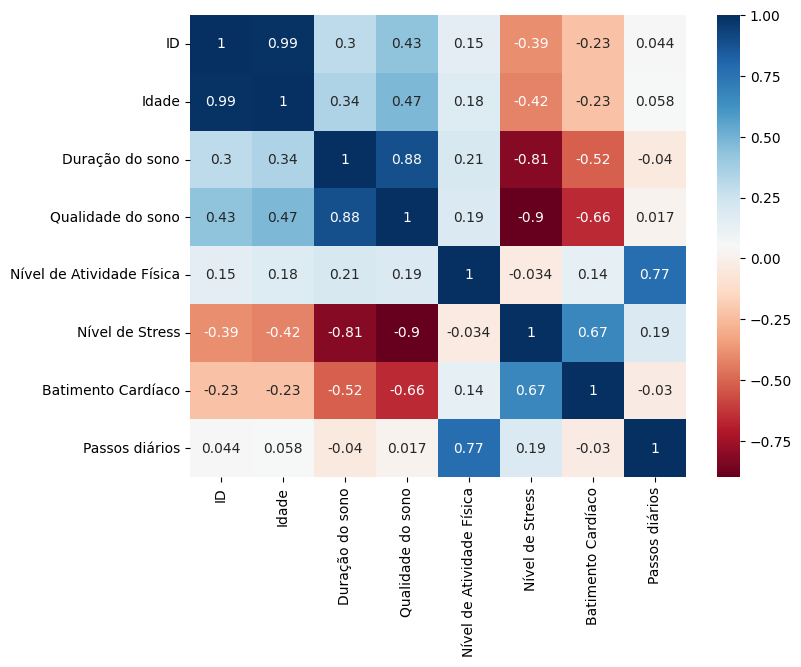

In [21]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(8,6))

# Definindo cores e legendas do gráfico 
sns.heatmap(base_corr, cmap='RdBu', annot = True); 

Aqui podemos verificar alguns resultados:

- A duração do sono é diretamente relacionada com a qualidade do sono, o que nos parece óbvio (corr = 0,88).
- Ao contrário, a duração do sono é inversamente relacionada ao nível de stress (corr = -0,81), o que pode demonstrar que mais horas de sono tendem a reduzir o nível de stress. Ou, o nível de stress é mais alto, quanto menos horas de sono o funcionário registra. Idem quando comparamos os níveis de stress e a própria qualidade do sono (corr = -0,90).
- O nível de atividades físicas não possui relações relevantes, contudo, pode estar diretamente relacionada ao índice de exercícios, representado aqui pelo número de passos (corr = 0,77).
Essas são as relações entre variáveis numéricas que podemos destacar.

Mas ainda precisamos avaliar as variáveis categóricas.

Podemos tentar aqui comparar as variáveis categóricas com outra variável que seja binária e, para fins didáticos, vamos analisar a qualidade do sono dos funcionários.

A variável Distúrbios do sono nos mostra o seguinte:

In [22]:
df['Distúrbio do sono'].value_counts()

Distúrbio do sono
-                 220
Apneia do sono     78
Insônia            76
Name: count, dtype: int64

220 funcionários foram classificados como sem nenhum distúrbio de sono.

Essa é uma boa variável para ser transformada em binária, ou seja:

- Pessoa tem distúrbio de sono
- Pessoa não tem distúrbio de sono.
Vamos fazer essa conversão da seguinte forma:

In [23]:
# Convertendo para uma nova variável binária

import numpy as np

df['Indicador - DS'] = np.where(df['Distúrbio do sono'] == '-', 'Não', 'Sim')
df['Indicador - DS'].value_counts()

Indicador - DS
Não    220
Sim    154
Name: count, dtype: int64

In [24]:
# Tabela de frequência para Indicador - DS
tab_freq_ds = df['Indicador - DS'].value_counts().reset_index()
tab_freq_ds.columns = ['Indicador - DS', 'Freq. Absoluta']

tab_freq_ds['Freq. Relativa'] = 100*(tab_freq_ds['Freq. Absoluta'] / tab_freq_ds['Freq. Absoluta'].sum()).round(3)
tab_freq_ds['Freq. Acumulada'] = tab_freq_ds['Freq. Relativa'].cumsum()
tab_freq_ds

,Indicador - DS,Freq. Absoluta,Freq. Relativa,Freq. Acumulada
0,Não,220,58.8,58.8
1,Sim,154,41.2,100.0


Um bom indício de comparação seria o IMC (índice de massa corporal) que usualmente está relacionado com algum distúrbio de sono, de acordo com a literatura.

Podemos utilizar a técnica de Information Value (IV) para compará-la, variável categórica, com a variável binária criada em cima da variável de distúrbios do sono (Indicador — DS).

O IV é, basicamente, um número que indica o quão eficazmente uma variável independente contínua (como o IMC) pode prever uma variável dependente binária (Distúrbios de Sono).

In [25]:
# Cruzamento das variáveis

tab_freq_imc_ds = pd.crosstab(df['Categoria IMC'], df['Indicador - DS'], margins=True, margins_name='Total')
tab_freq_imc_ds

Indicador - DS,Não,Sim,Total
Categoria IMC,,,
Normal,200,16,216
Obeso,1,9,10
Sobrepeso,19,129,148
Total,220,154,374


Convertendo o resultado para valores percentuais:

In [26]:
tab_freq_imc_ds = pd.crosstab(df['Categoria IMC'], df['Indicador - DS'], margins=True, margins_name='Total', normalize='columns')

tab_freq_imc_ds

Indicador - DS,Não,Sim,Total
Categoria IMC,,,
Normal,0.909091,0.103896,0.577540
Obeso,0.004545,0.058442,0.026738
Sobrepeso,0.086364,0.837662,0.395722


Seguimos calculando o WoE (weight of evidence). O Weight of Evidence (WoE) avalia o poder de previsão de uma categoria em relação a outra.

Se uma das categorias de uma variável apresentar uma proporção significativa de “eventos” em comparação com a proporção de “não eventos”, obteremos um valor alto de WoE. Isso indica que essa categoria da variável distingue eficientemente os eventos dos não eventos.

Calculamos o WoE através do logaritmo neperiano da diferença entre os valores percentuais da variável binária em relação a cada categoria da variável categórica.

In [27]:
# Criação de uma coluna com o ln(ODDS)

tab_freq_imc_ds['ln(ODDS)'] = np.log(tab_freq_imc_ds['Não'] / tab_freq_imc_ds['Sim'])
tab_freq_imc_ds

Indicador - DS,Não,Sim,Total,ln(ODDS)
Categoria IMC,,,,
Normal,0.909091,0.103896,0.577540,2.169054
Obeso,0.004545,0.058442,0.026738,-2.553900
Sobrepeso,0.086364,0.837662,0.395722,-2.272048


É chegada a hora de calcular o IV, uma medida que ajuda a entender a importância de uma variável em relação a uma outra variável. Ele nos diz o quão bem uma variável pode prever ou explicar o resultado desejado.

- Um IV alto significa que a variável é muito útil para prever o resultado.
- Um IV baixo significa que a variável não é muito útil para prever o resultado.
Usualmente, há uma regra básica que nos permite dizer se uma variável terá um bom poder preditivo ou não através do IV:

- IV < 0.02: não é útil;
- 0.02 ≤ IV < 0.1: baixo poder preditivo;
- 0.1 ≤ IV < 0.3: moderado poder preditivo;
- 0.3 ≤ IV < 0.5: alto poder preditivo;
- IV ≥ 0.5: suspeito (pode haver problemas nos dados ou cálculos incorretos) — overfitting.

In [28]:
# Vamos agora calcular os IV's
tab_freq_imc_ds['IV'] = ((tab_freq_imc_ds['Não'] - tab_freq_imc_ds['Sim'])*tab_freq_imc_ds['ln(ODDS)'])
tab_freq_imc_ds

Indicador - DS,Não,Sim,Total,ln(ODDS),IV
Categoria IMC,,,,,
Normal,0.909091,0.103896,0.577540,2.169054,1.746511
Obeso,0.004545,0.058442,0.026738,-2.553900,0.137645
Sobrepeso,0.086364,0.837662,0.395722,-2.272048,1.706987


In [29]:
# Somatória dos IV's calculados para cada categoria.

iv_final = tab_freq_imc_ds['IV'].sum().round(2)
iv_final

np.float64(3.59)

Temos, portanto, um IV de 3,59 para as variáveis de IMC e Distúrbios de sono.

Apesar do valor alto suscitar dúvidas se os dados são de qualidade ou se houve erros na análise, essas duas variáveis foram escolhidas com base num conhecimento prévio da literatura médica que nos diz que altos índices de IMC estão relacionados a distúrbios de sono como apneia ou ronco.

Portanto, o valor encontrado faz bastante sentido.

Contudo, o IV tende a funcionar melhor com variáveis categóricas que têm um número razoável de categorias, não indicando causalidade, assim como não capturando relações não lineares.

Podemos agora comparar outras variáveis, utilizando-se do mesmo procedimento feito.

Para isso, todo esse procedimento pode ser resumido em uma função no Python, que calculará automaticamente os valores de IV, para as demais variáveis categórias e binárias de interesse. O código para isso é a compilação de todo o cálculo de IV feito até agora, qual seja:

In [ ]:
def iv(x,y):
    """
    x: Variável categórica desejada
    y: Variável binária desejada
    """
    df=pd.crosstab(x,y,margins=True, margins_name='Total', normalize='columns') # cálculo das frequências
    
    df['ln(Odds)'] = np.log(df['Sim']/df['Não']) # cálculo do ln(ODDS)
    
    # Cálculo do IV    

    df['IV'] = (df['Sim']-df['Não'])*df['ln(Odds)'] # cálculo do IV pra cada linha
      
    return df.style.format('{:.1%}'), df['IV'].sum().round(2); 

# Conclusões

Para os fins didáticos desse exercício, concluímos que um alto índice de massa corporal (IMC) está diretamente relacionado a distúrbios do sono.

Podemos estender essa análise para variáveis como sexo, idade ou pressão sanguínea.

Na segunda parte desse estudo, contemplaremos tais variáveis mas, até aqui, está demonstrado como o Python pode auxiliar na análise de quaisquer tipos de dados, de forma bastante direta.

Seu uso será melhor percebido com bases gigantescas, com milhões de linhas de dados onde softwares de planilha não conseguiriam processar tamanha quantidade de informação.

Mas o mais importante é compreender que a seleção de técnicas estatísticas é o que diferencia uma análise estruturada, de uma mera apresentação de números.

Por isso, conhecer os princípios e as técnicas estatísticas mais comumente utilizadas em análise de dados é fundamental para a agregação de valor da sua análise.

M.F.
https://www.linkedin.com/in/marcelfraga/